In [1]:
import numpy as np
import neuraltda.topology3 as tp3
import matplotlib.pyplot as plt
%matplotlib inline

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
kwikfile = '/home/brad/experiments/B1146/sorted/block-4-AP-2300-ML-400-Z-1750/experiment1_101.kwik'
spikes = tp3.kwik_get_spikes(kwikfile)
trials = tp3.kwik_get_trials(kwikfile)


In [3]:
def get_trial_spiketrains(spikes, trials, padding_secs, fs):
    ''' Organize all trials into a dictionary:
    trial_spiketrains[stim] = list of spiketrains
    '''
    trial_spiketrains = {}
    for trial in trials:
        
        stim_name = trial[0]
        stim_start = trial[1]
        stim_end = trial[2]
        
        padding_samps = np.round(padding_secs*fs)
        trial_start = np.amax([0, stim_start - padding_samps])
        trial_end = stim_end + padding_samps
        
        trial_spikes = []
        tp3.spikes_in_interval(spikes, trial_start, trial_end, trial_spikes)
        if stim_name not in trial_spiketrains.keys():
            trial_spiketrains[stim_name] = []
        trial_spiketrains[stim_name].append((trial_start, trial_end, stim_start, stim_end, trial_spikes))
    return trial_spiketrains

from itertools import groupby

def spike_id(spike):
    return spike[1]

def spike_time(spike):
    return spike[0]

def get_unit_spike_times(spikes):
    sorted_spikes = sorted(spikes, key=spike_id)
    spiketimes = []
    units = []
    for k, g in groupby(sorted_spikes, spike_id):
        unit_spiketimes = [x[0] for x in g]
        spiketimes.append(unit_spiketimes)
        units.append(k)
    return (units, spiketimes)

In [4]:
trial_spiketrains = get_trial_spiketrains(spikes, trials, 2, 30000)

255862189 257194541


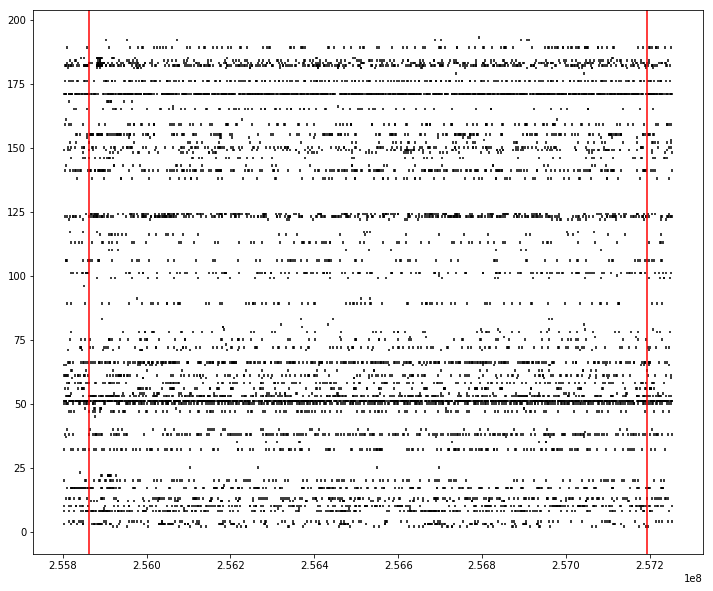

In [67]:
test_spikes = test['rmp5ms_180-12.wav.sine'][10][-1]

stim_start, stim_end = test['rmp5ms_180-12.wav.sine'][10][2:4]
print(stim_start, stim_end)
units, spiketimes = get_unit_spike_times(test_spikes)
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(1,1,1)
raster = ax.eventplot(spiketimes, lineoffsets=units, color='k')
ax.axvline(stim_start, color='r')
ax.axvline(stim_end, color='r')
ax.set_xlim([])

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


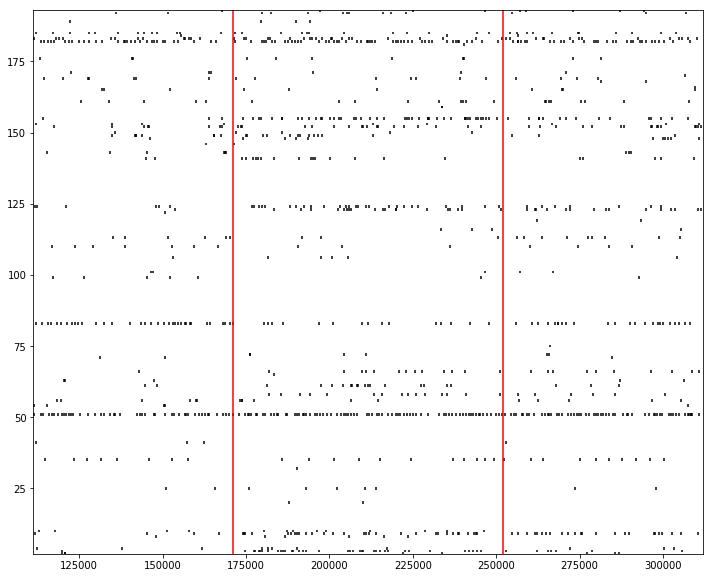

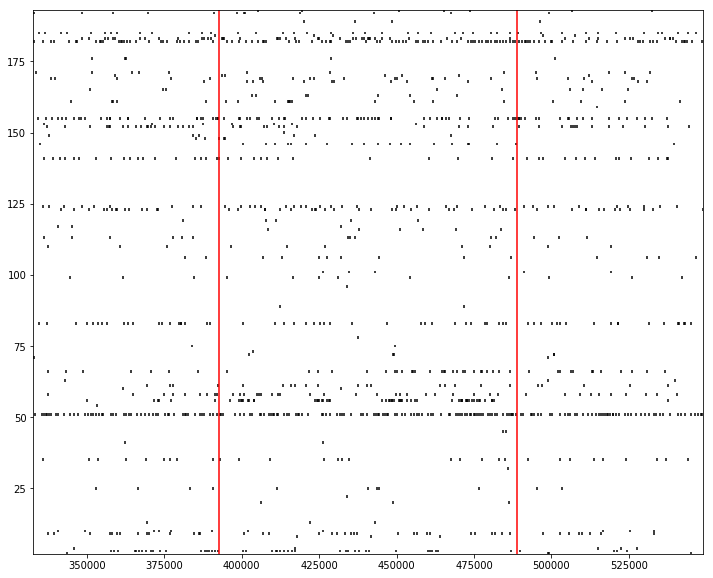

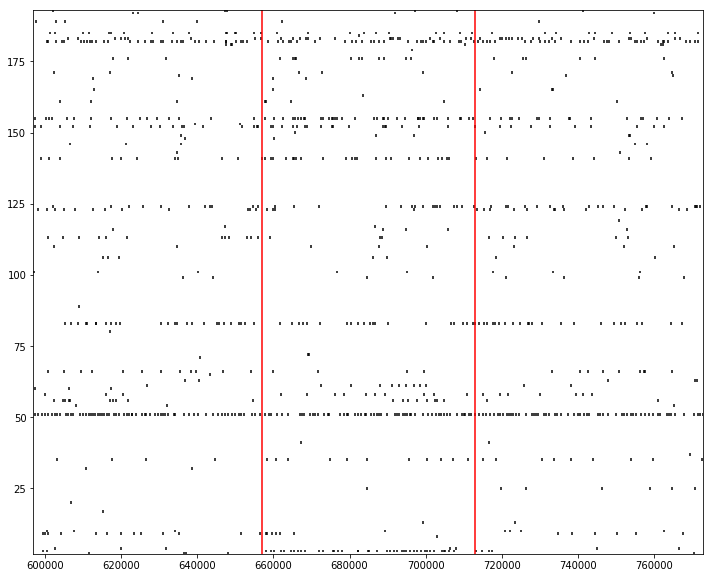

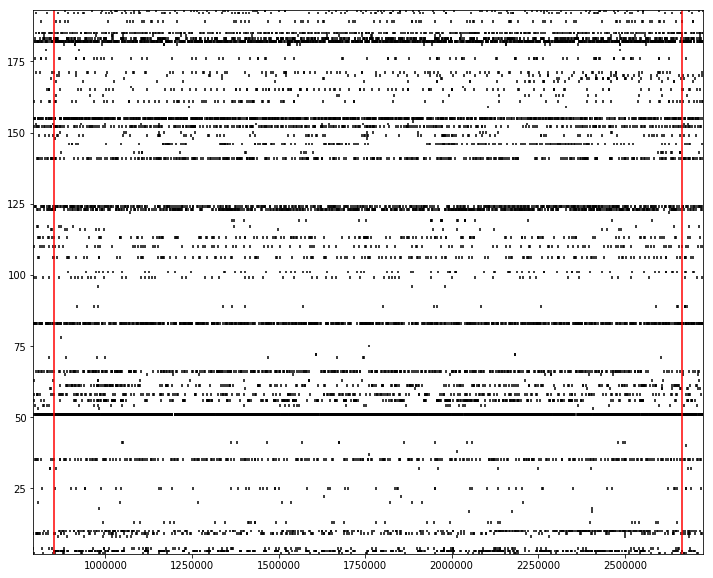

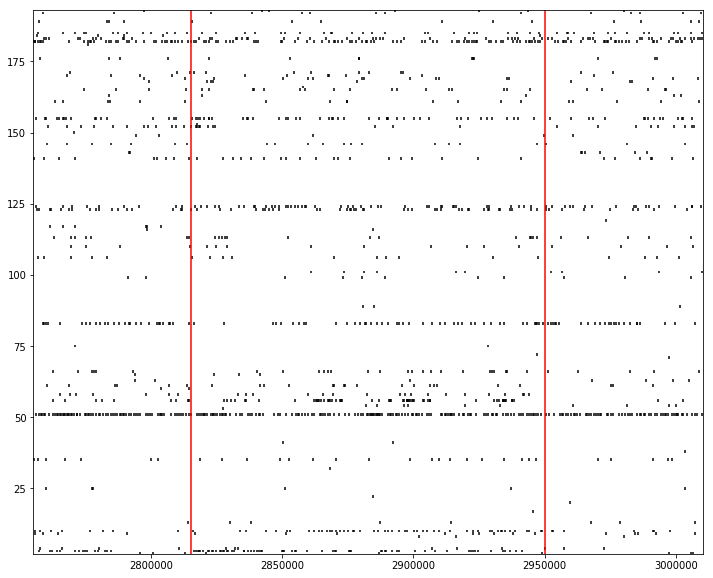

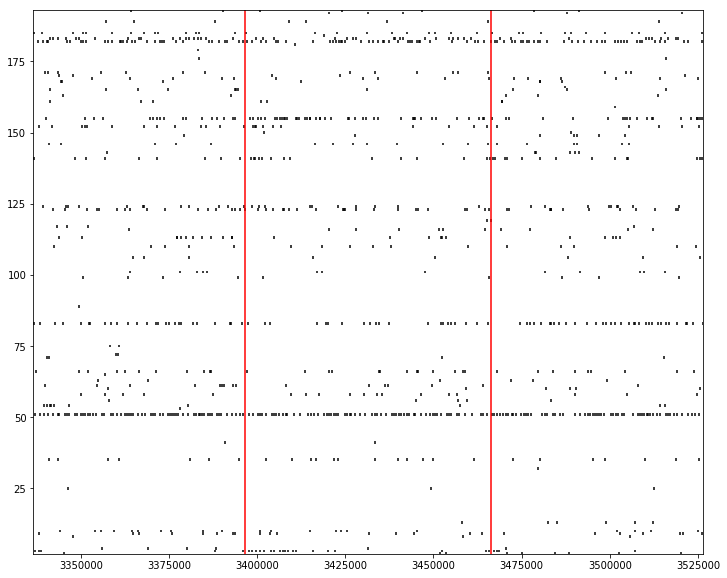

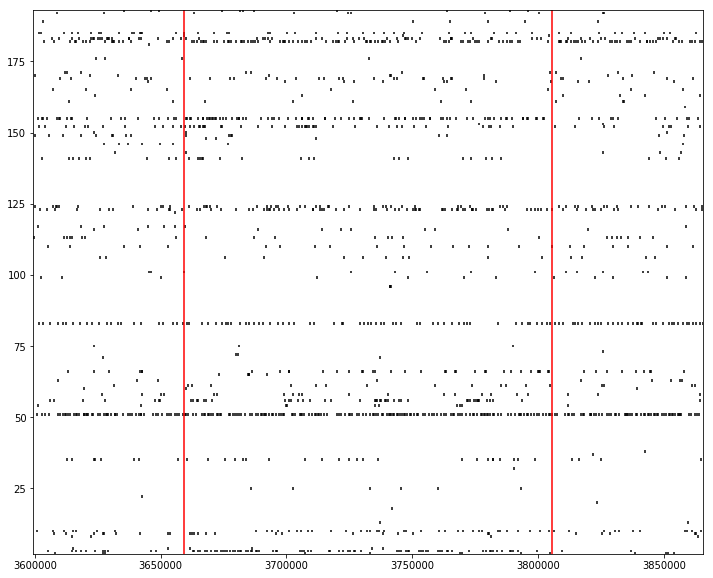

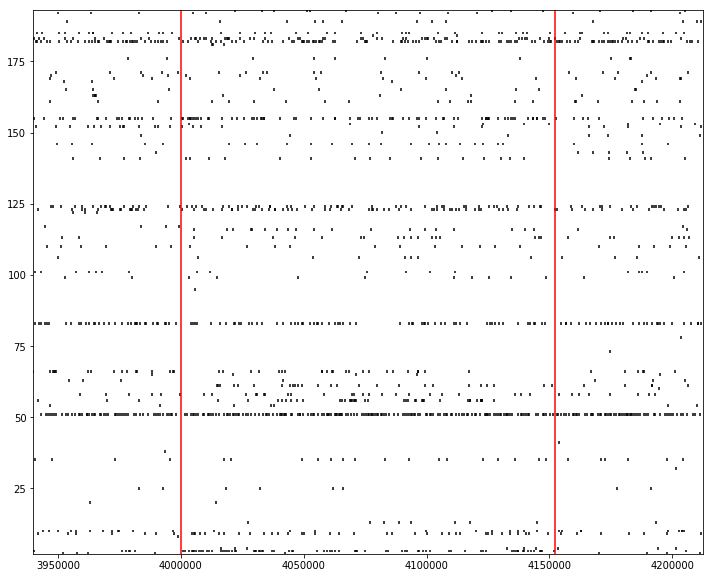

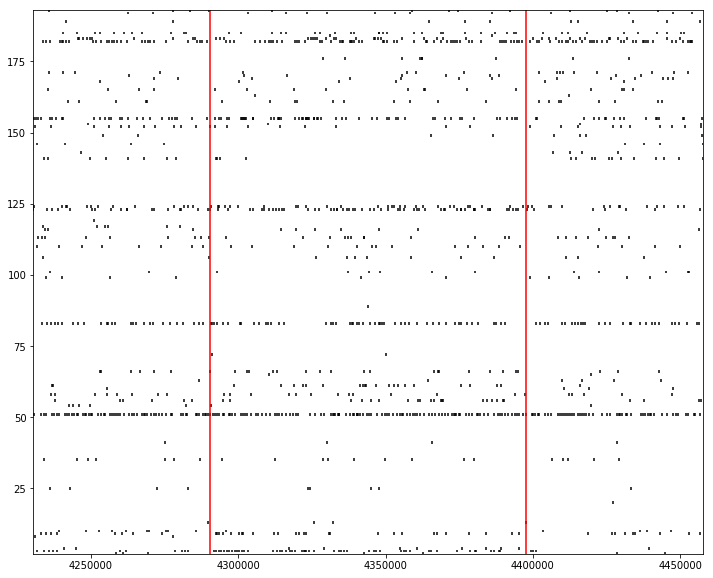

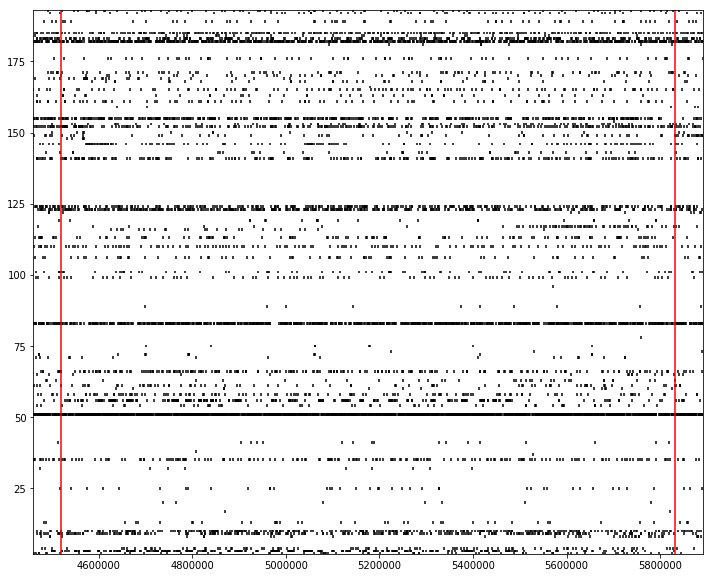

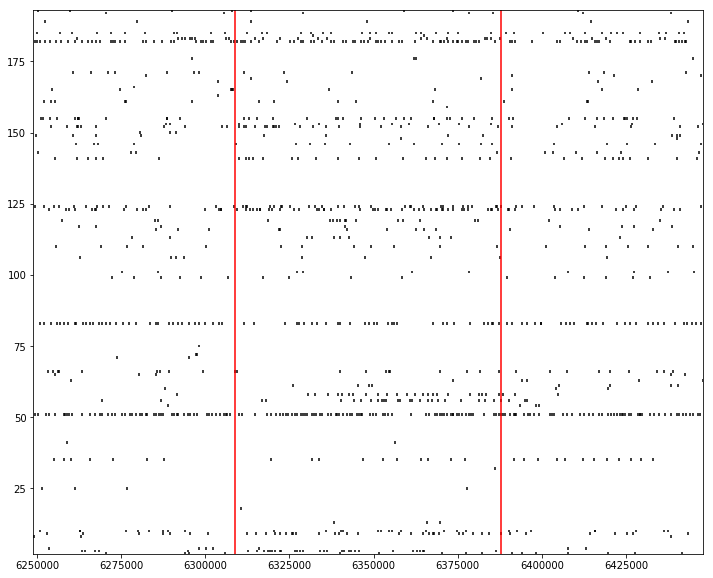

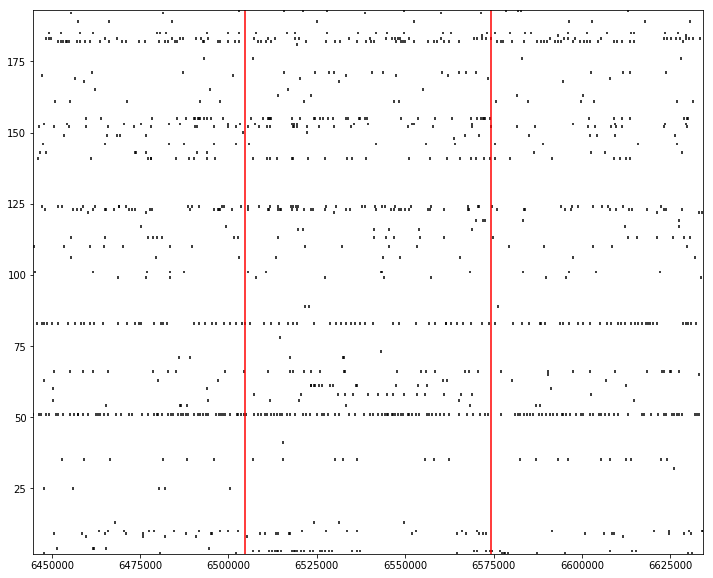

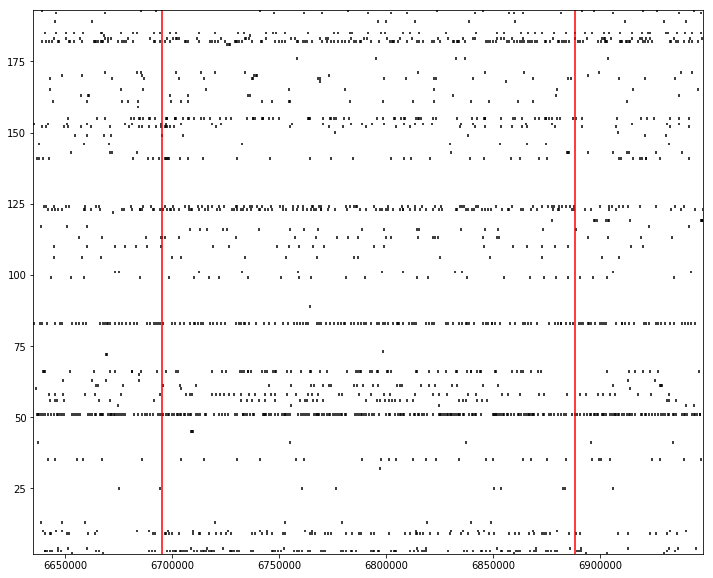

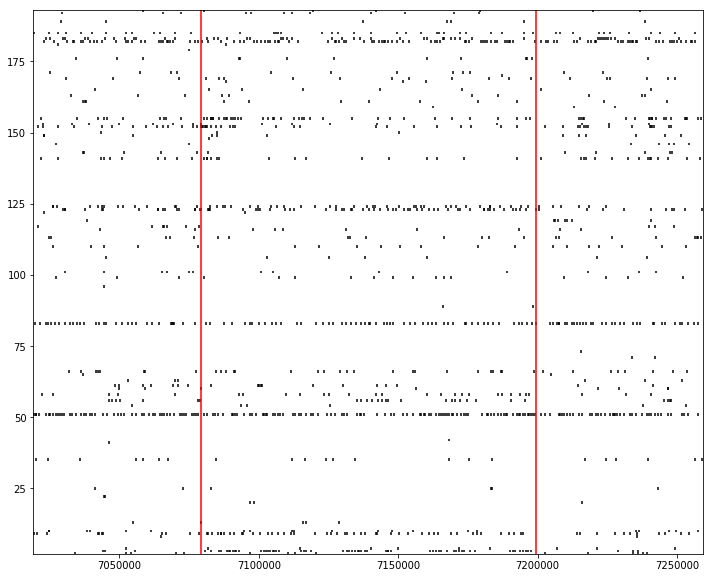

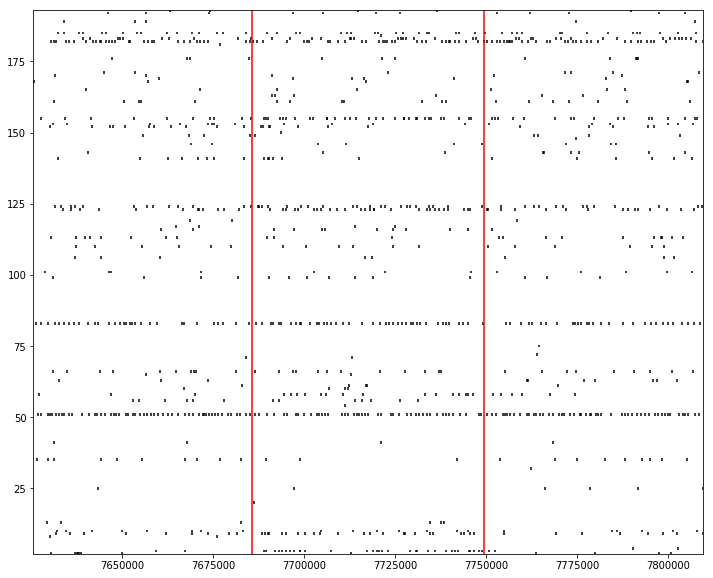

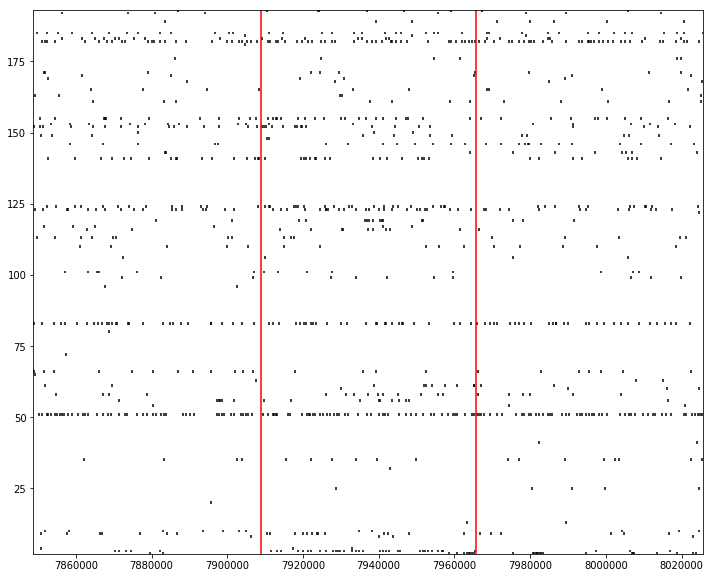

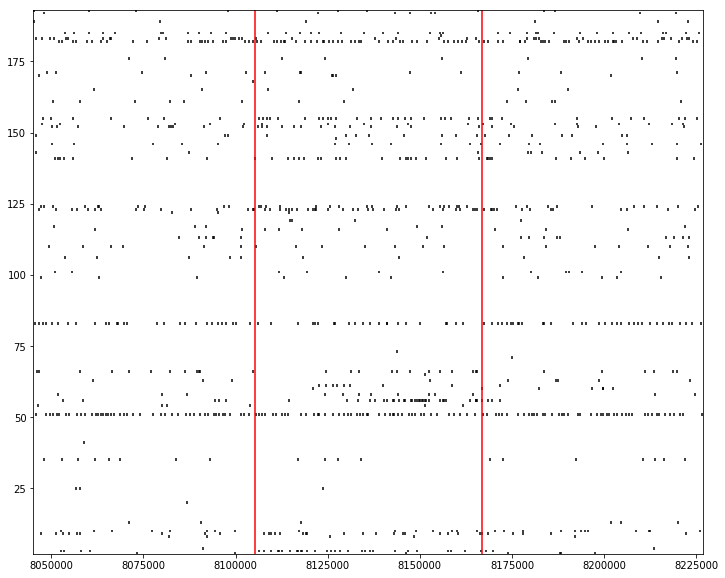

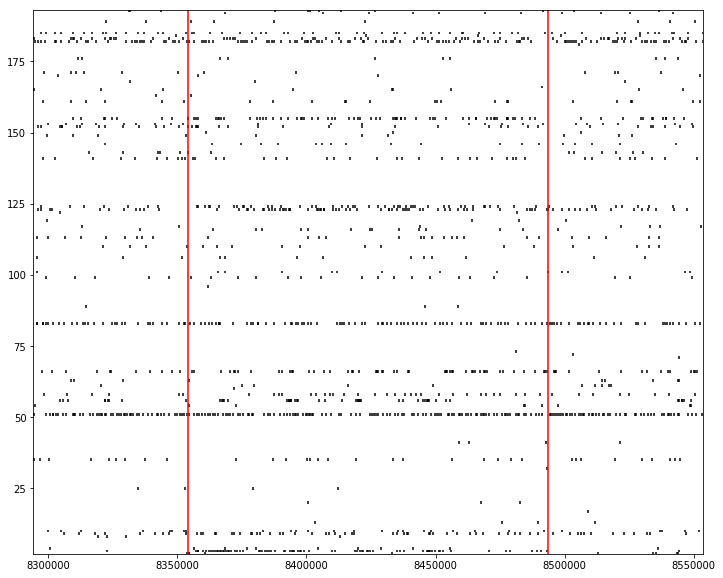

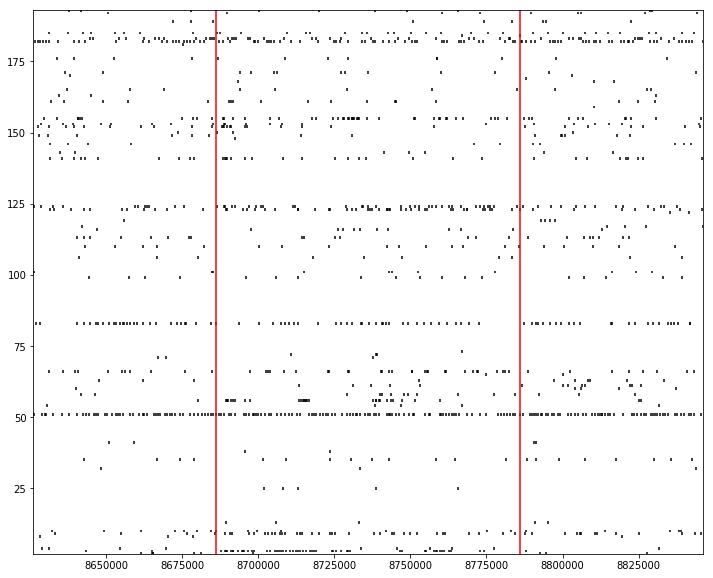

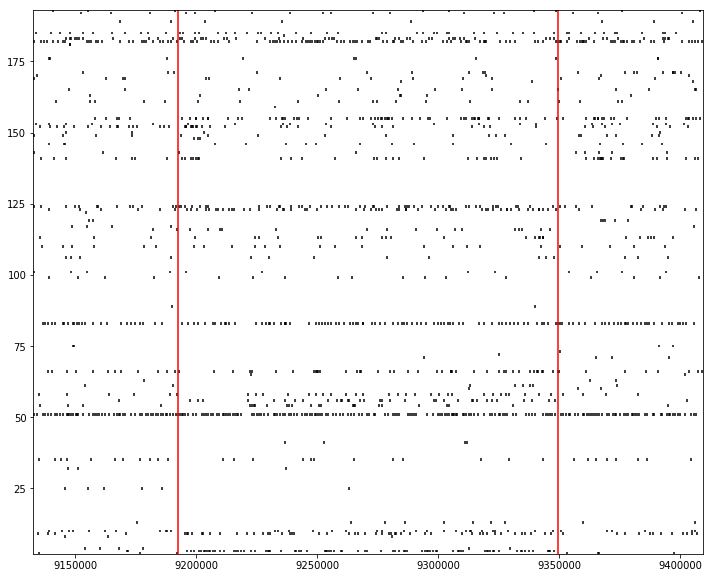

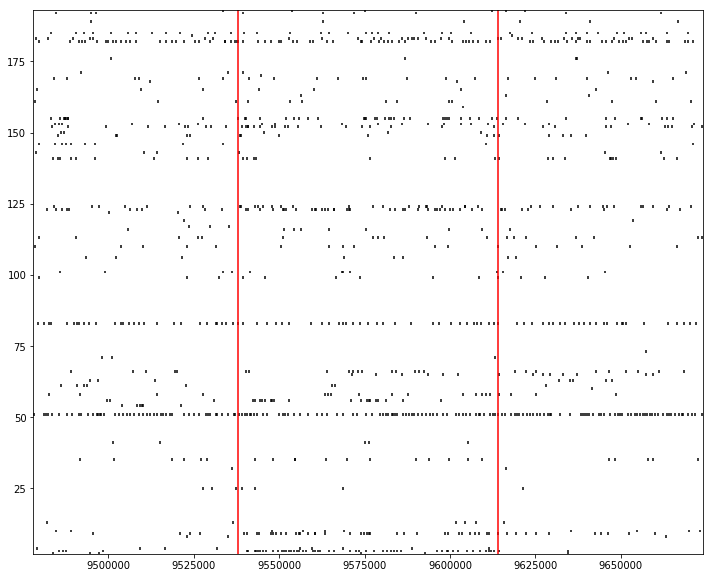

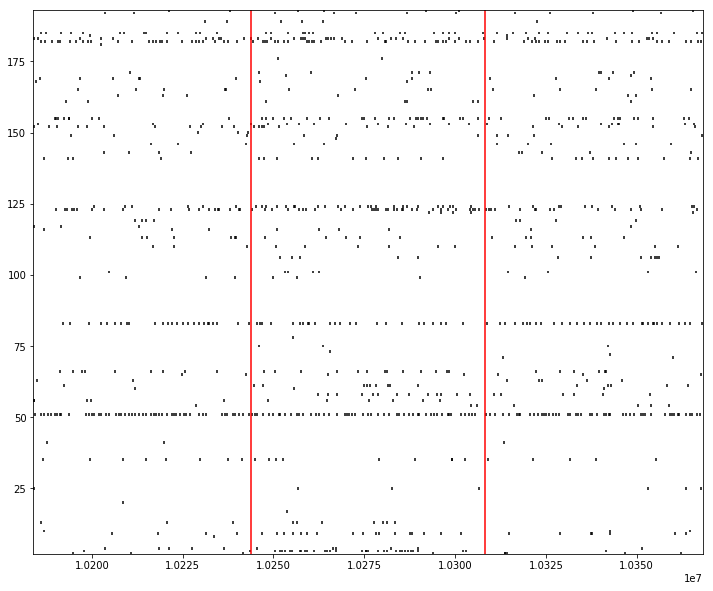

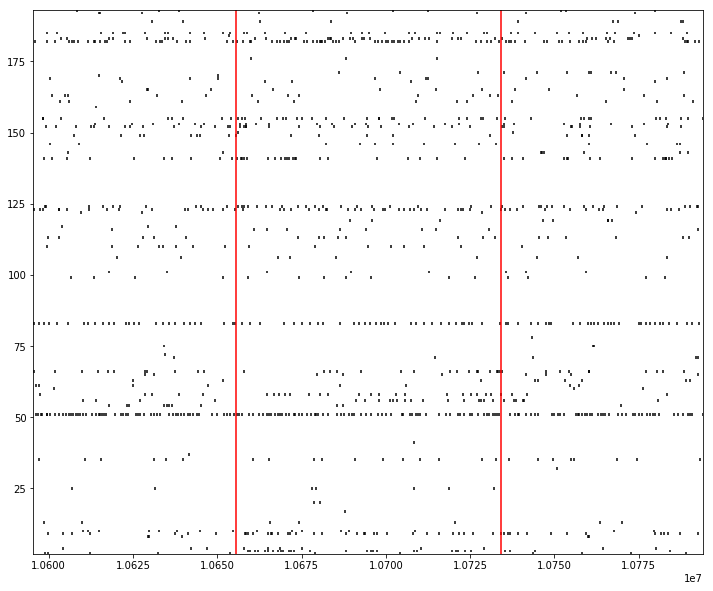

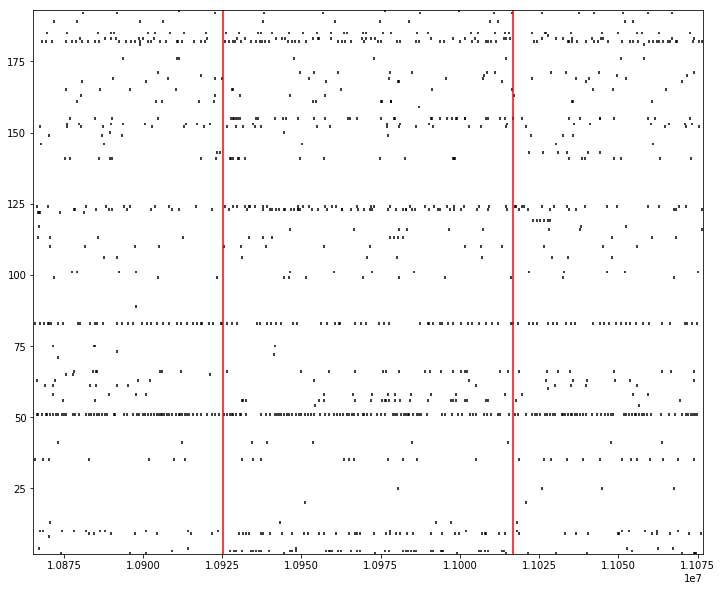

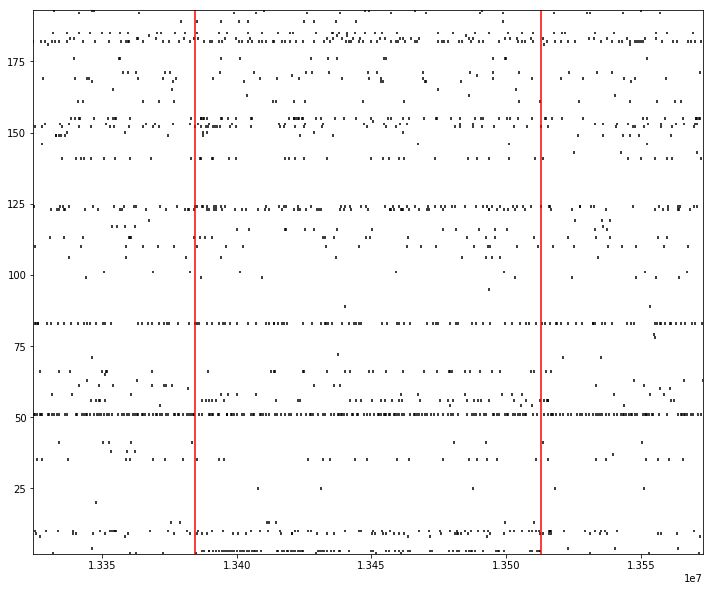

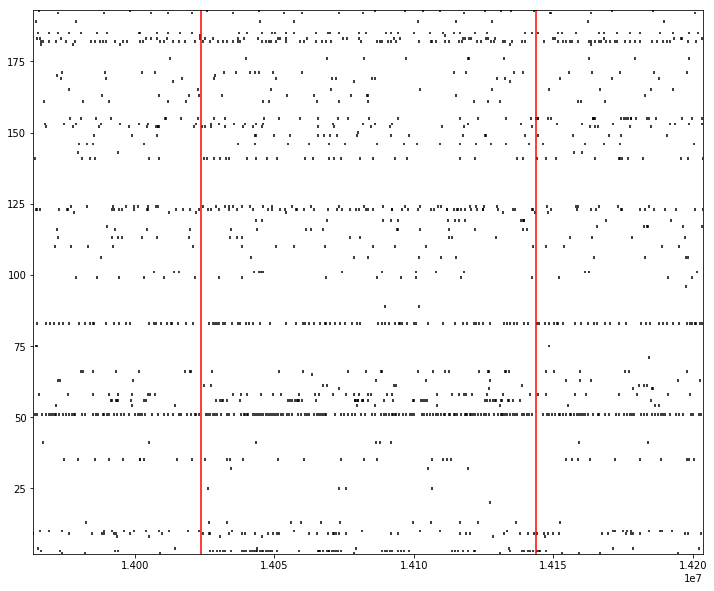

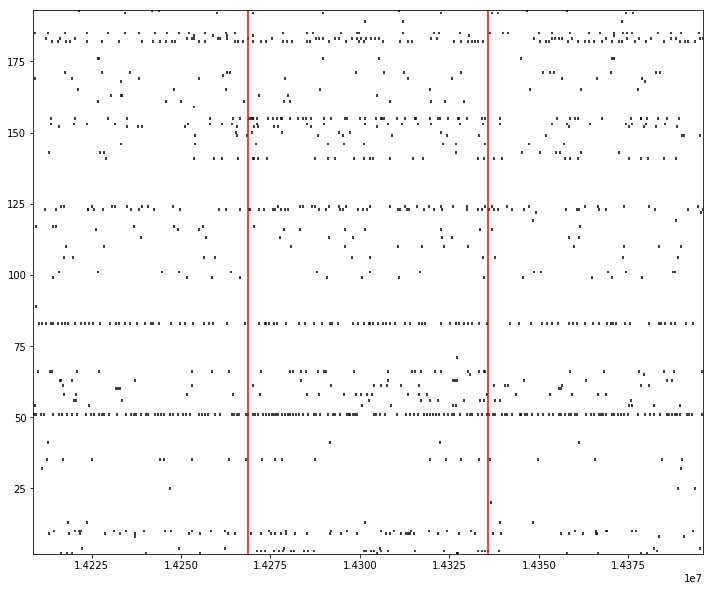

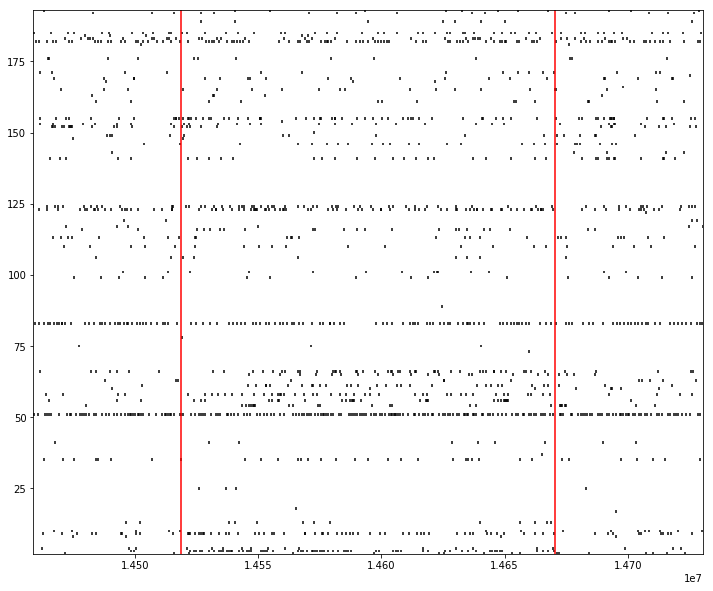

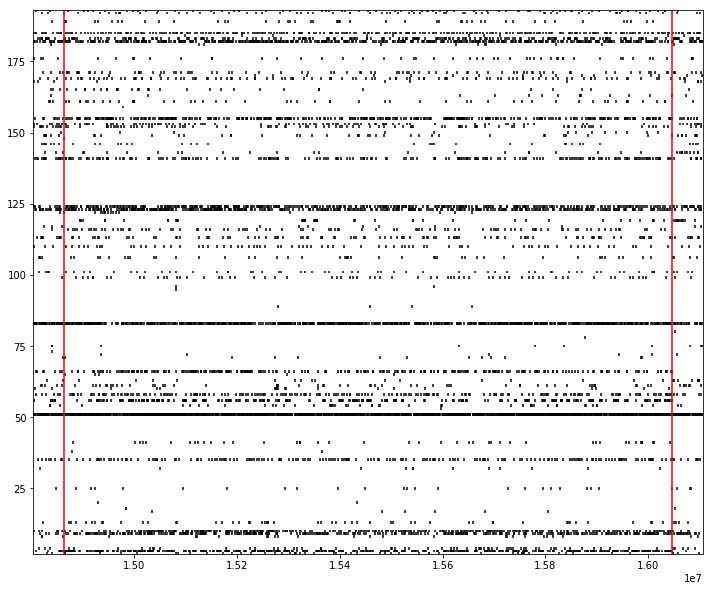

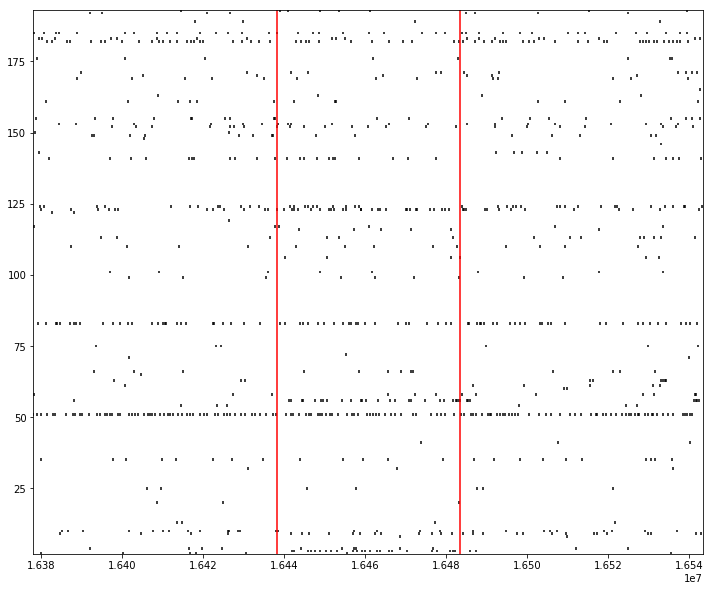

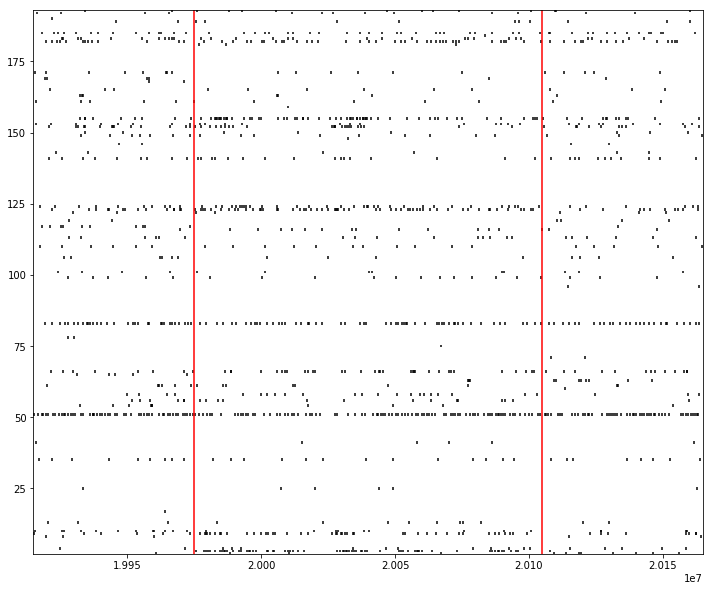

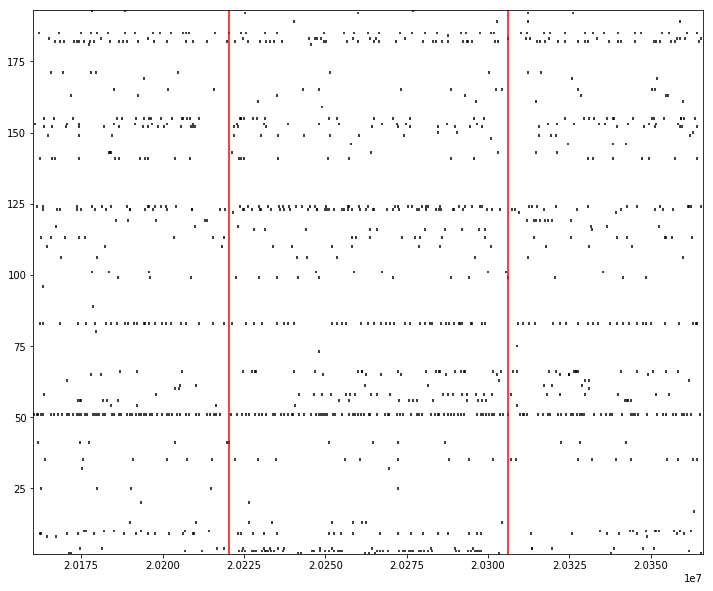

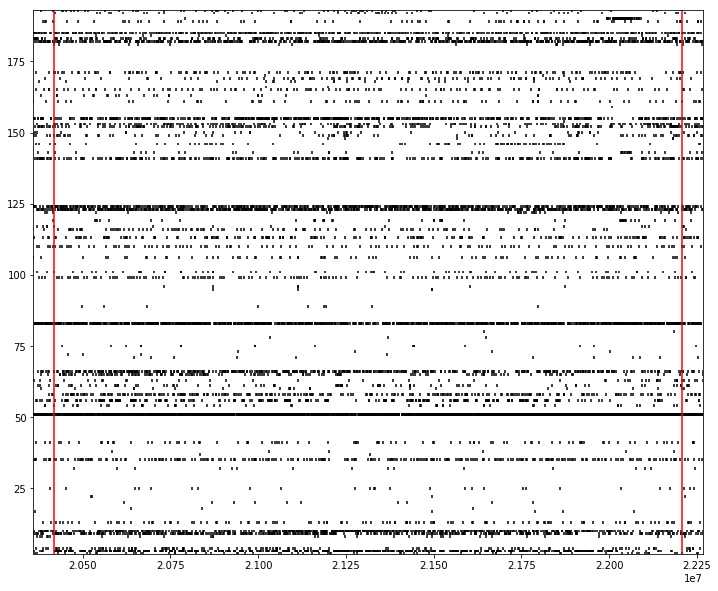

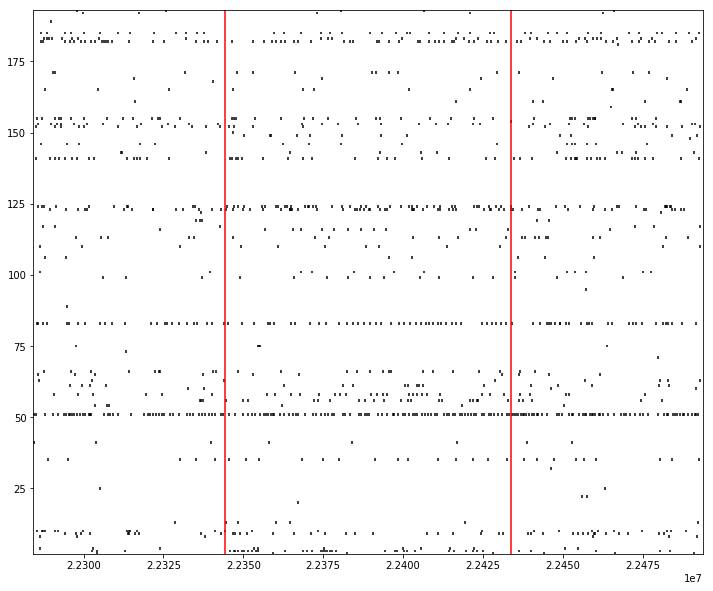

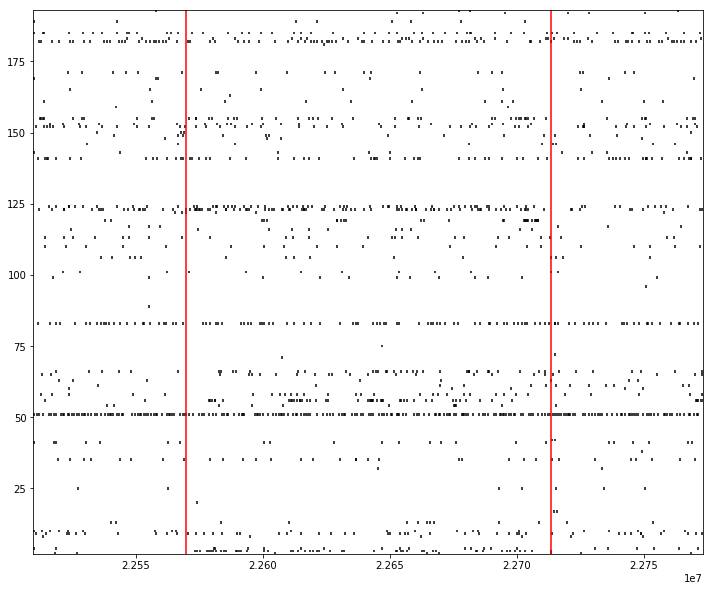

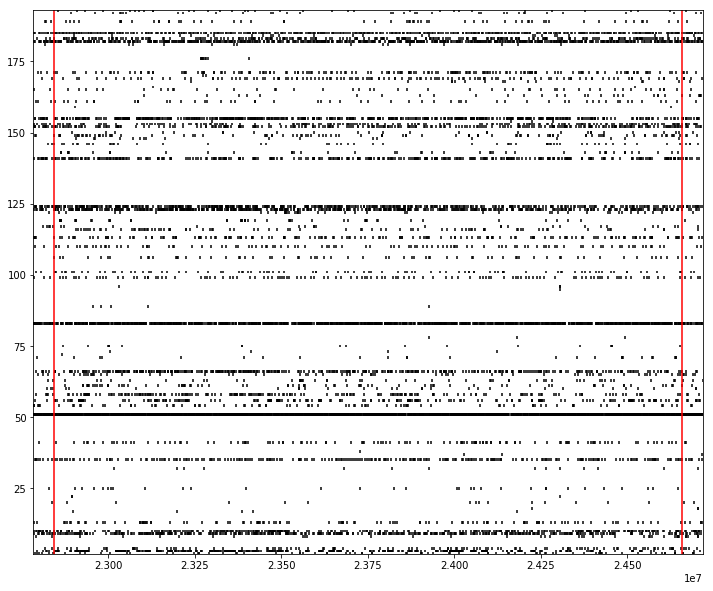

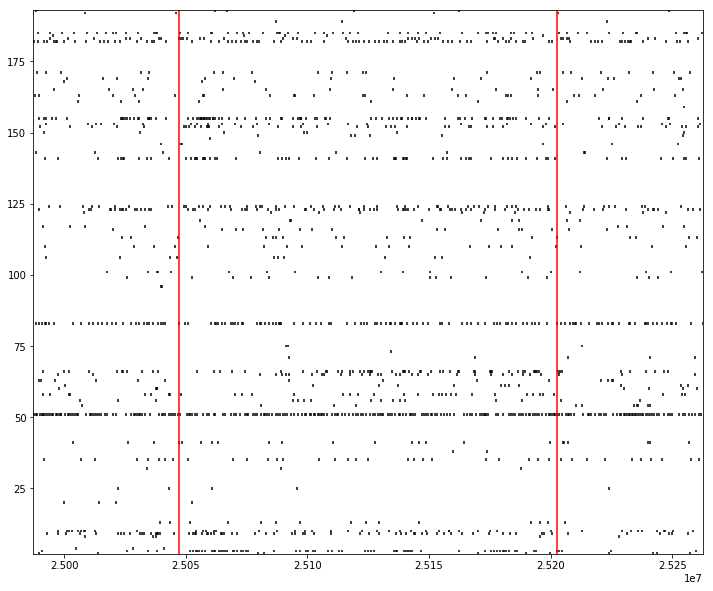

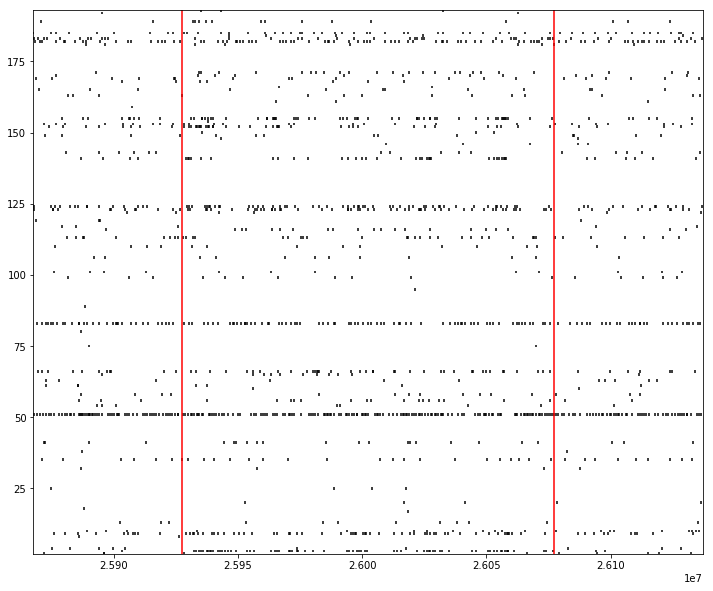

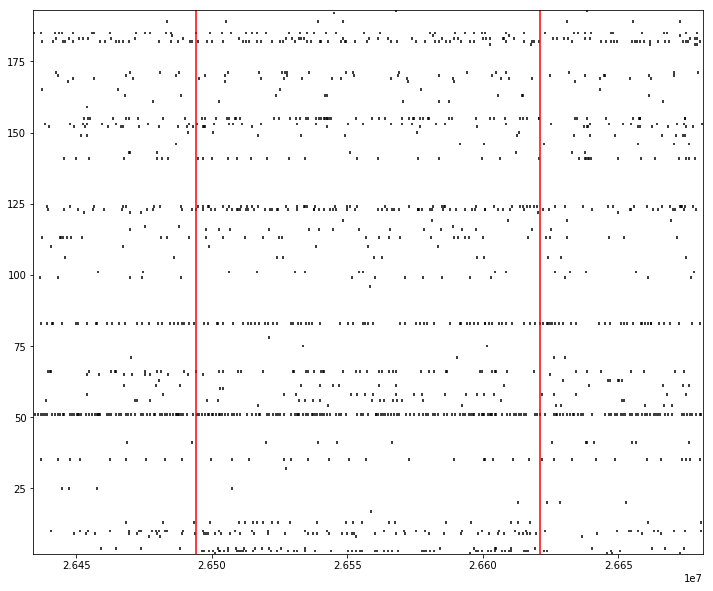

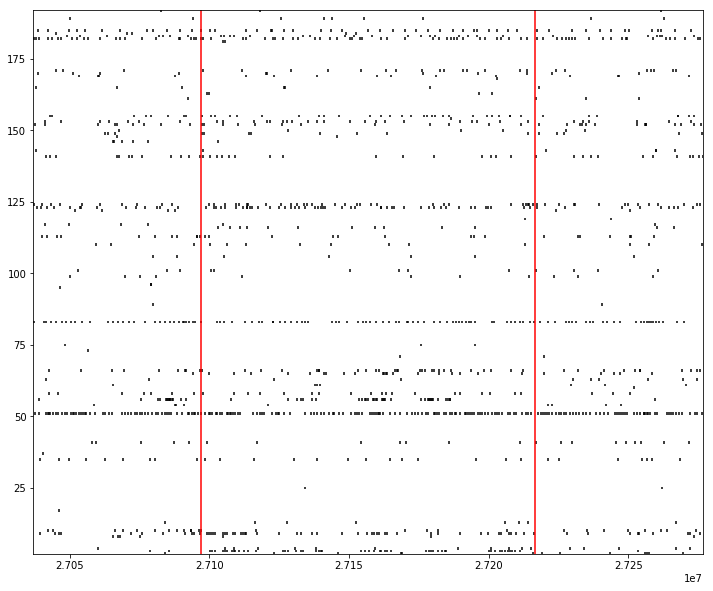

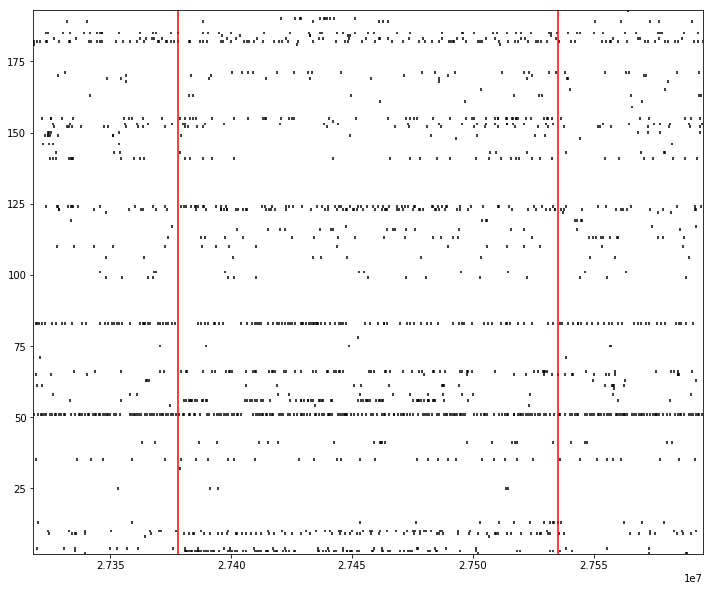

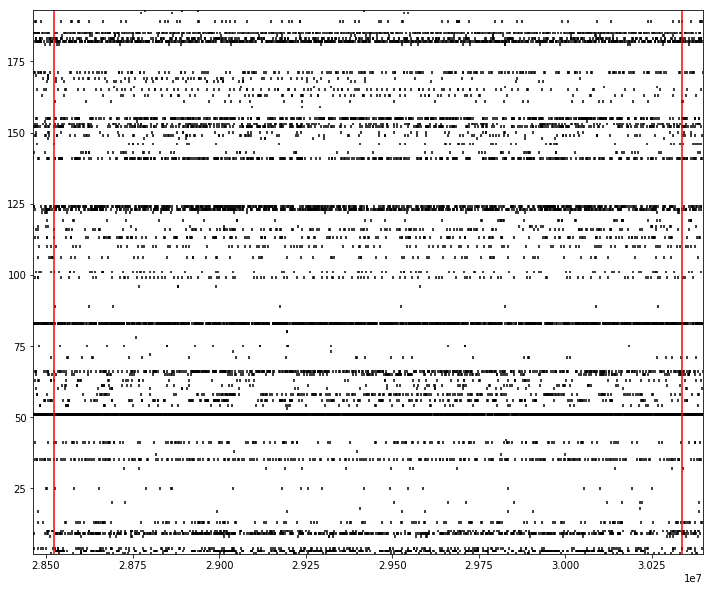

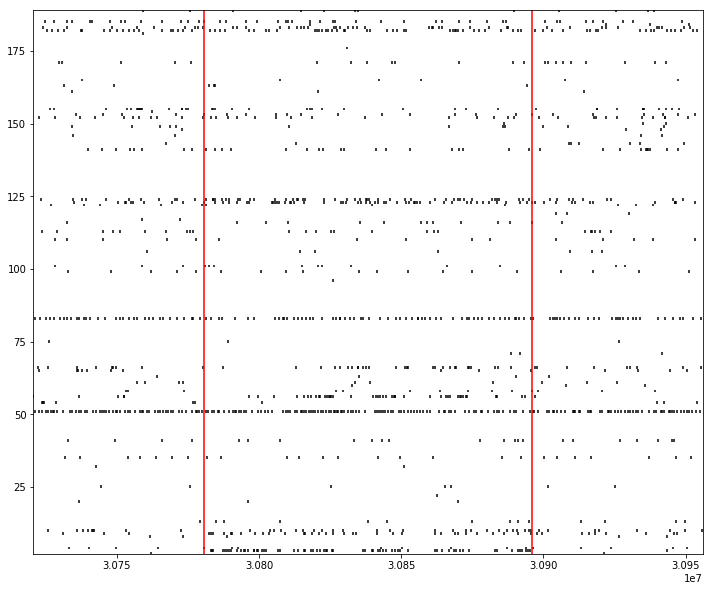

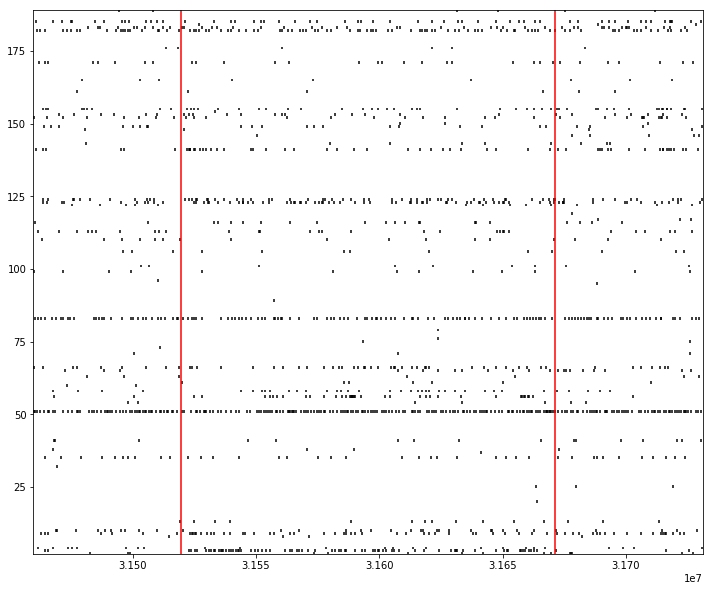

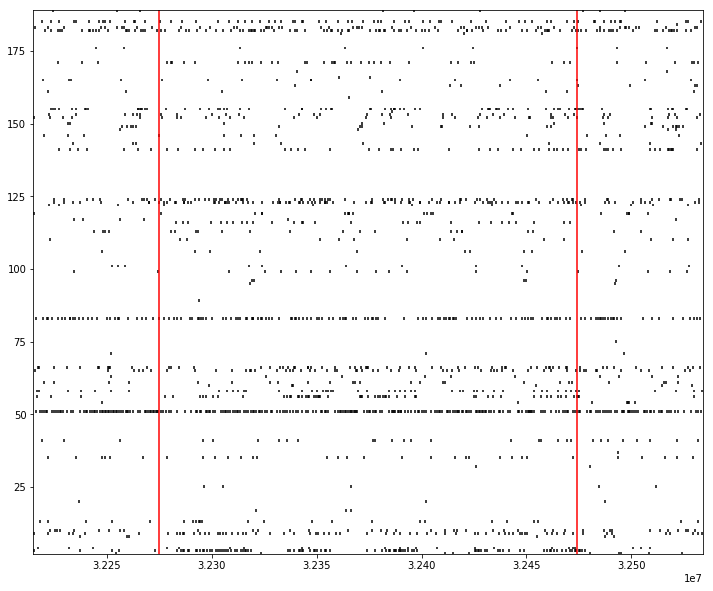

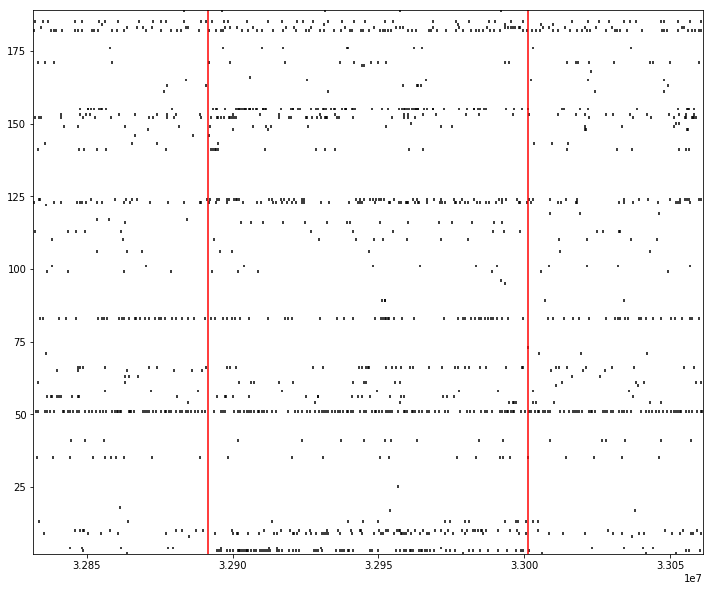

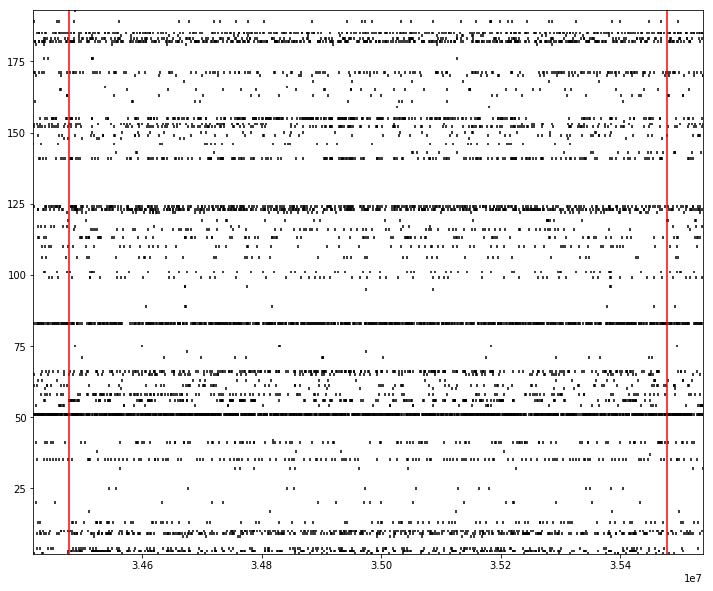

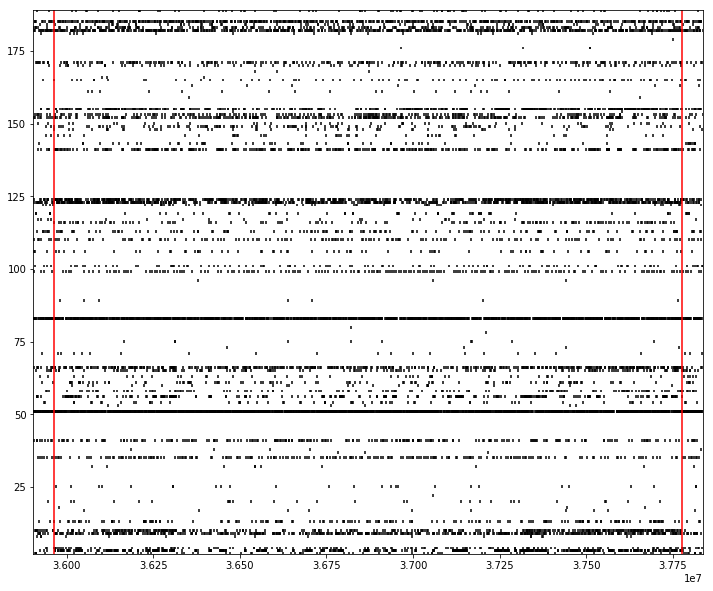

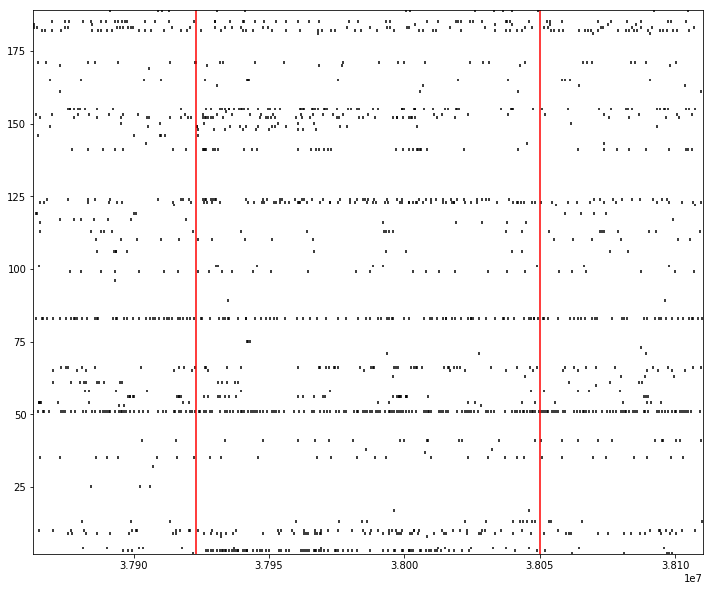

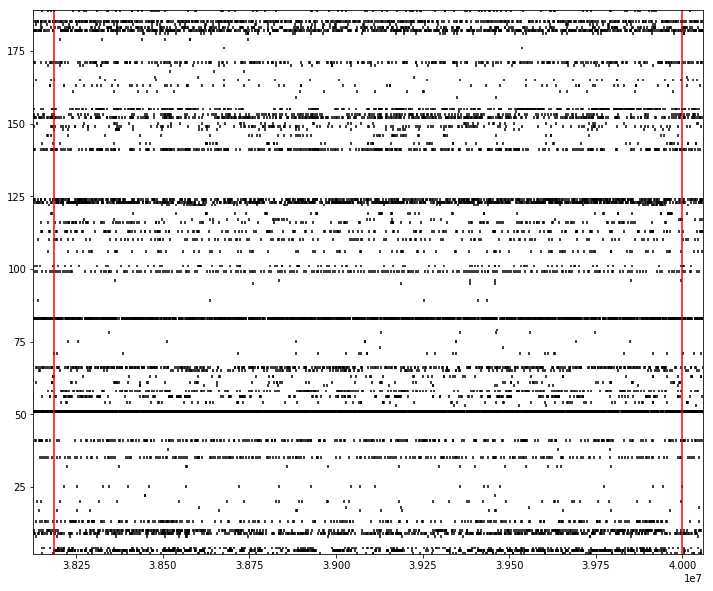

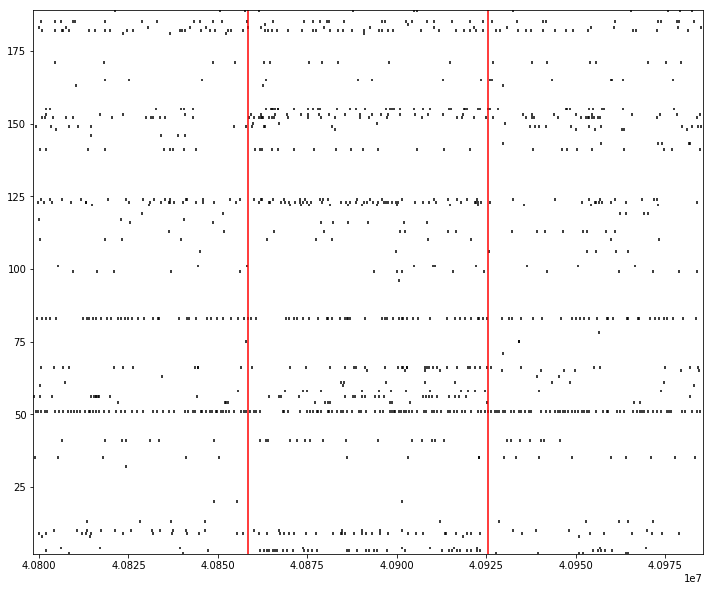

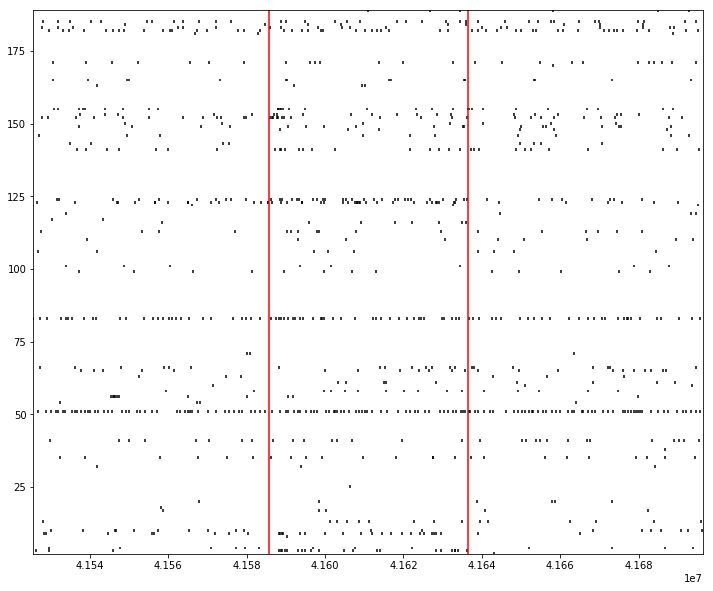

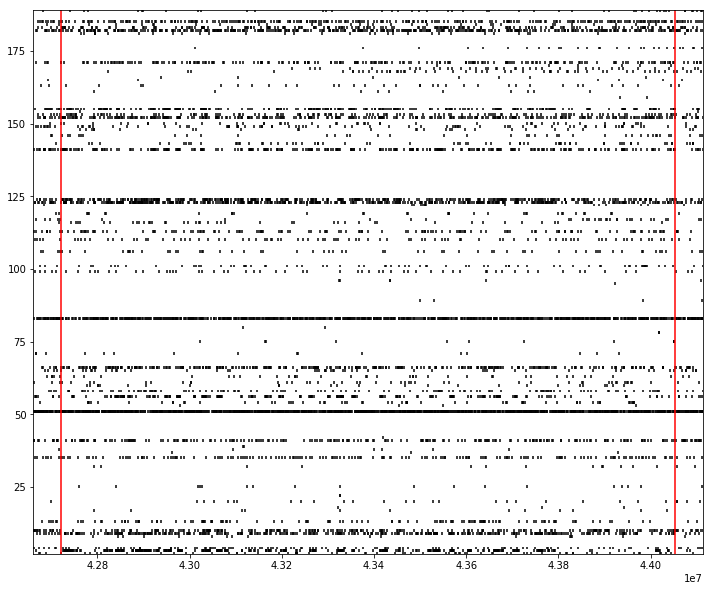

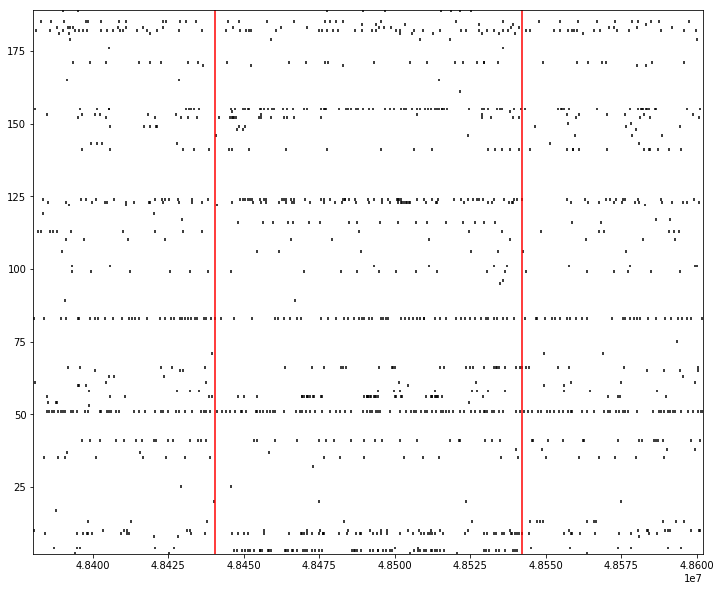

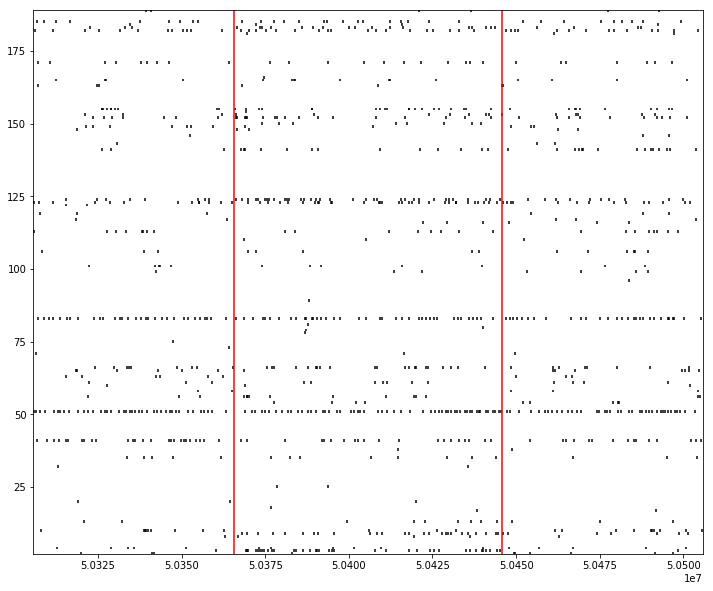

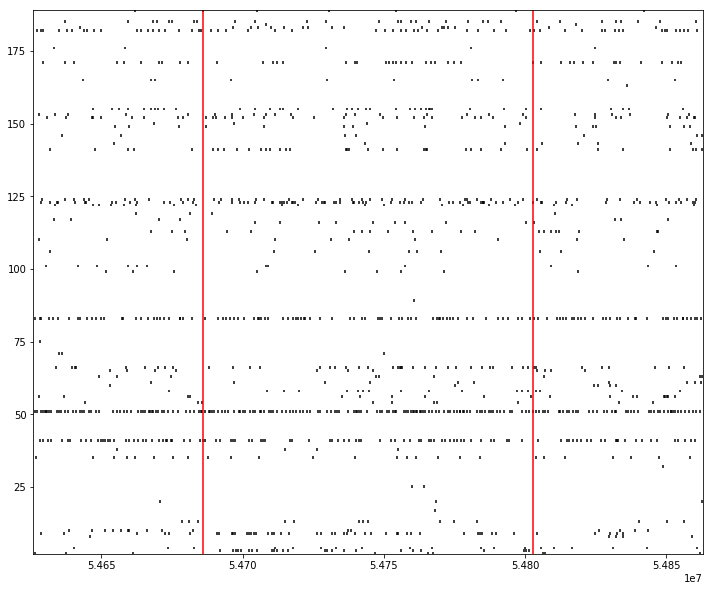

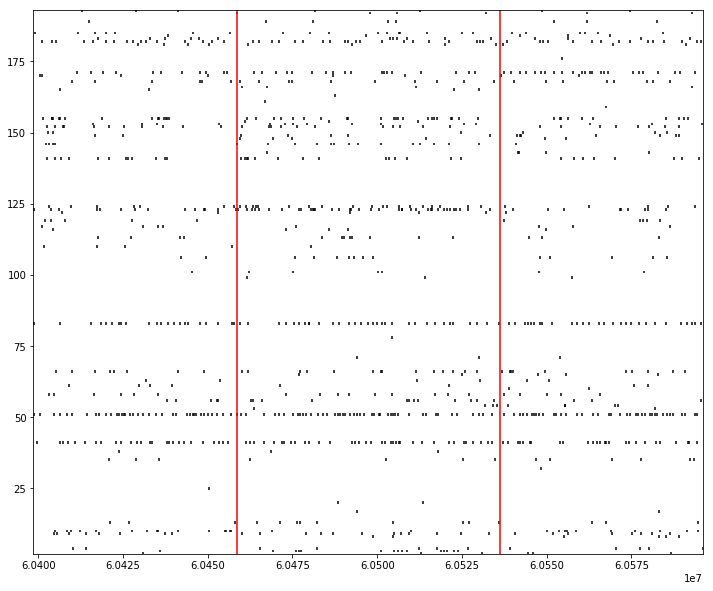

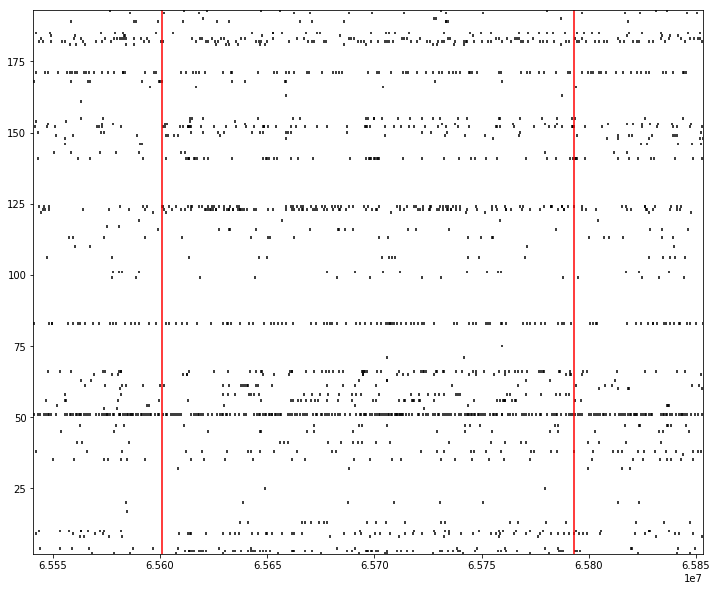

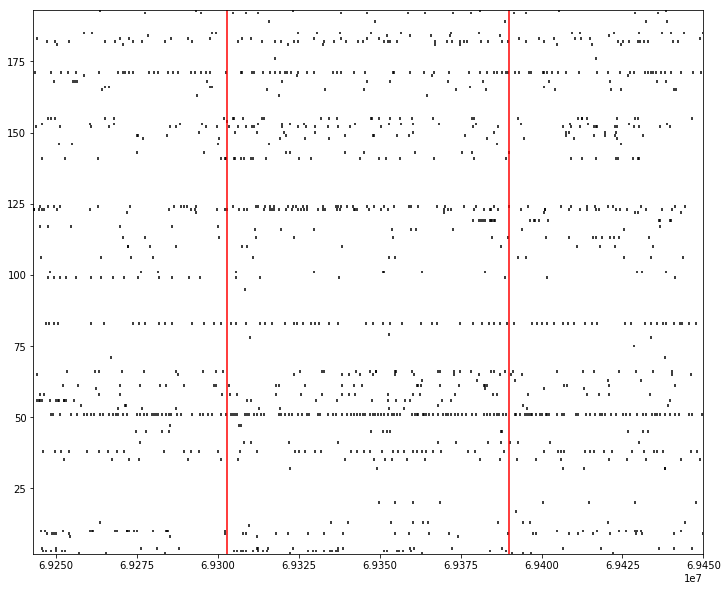

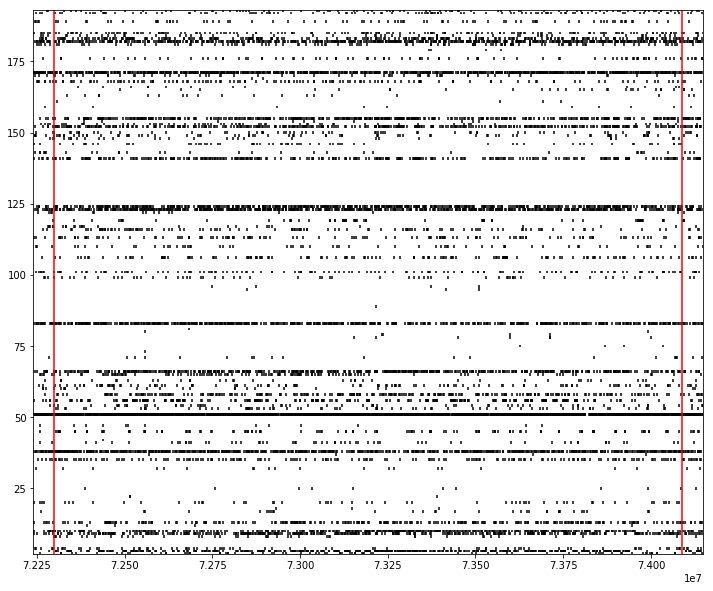

In [6]:


for stim in trial_spiketrains.keys():
    trial_start, trial_end, stim_start, stim_end, trial_spikes = trial_spiketrains[stim][0]
    units, spiketimes = get_unit_spike_times(trial_spikes)
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(1,1,1)
    raster = ax.eventplot(spiketimes, lineoffsets=units, color='k')
    ax.axvline(stim_start, color='r')
    ax.axvline(stim_end, color='r')
    ax.set_xlim([trial_start, trial_end])
    ax.set_ylim([np.amin(units), np.amax(units)])